#### Autograd

In [1]:
%matplotlib inline

In [2]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

##### Requiques_grad = True

In [3]:
# gerando eixo x  [0, 6.28]
a = torch.linspace(0., 2. * math.pi, steps=23, requires_grad=True)
print(a)

tensor([0.0000, 0.2856, 0.5712, 0.8568, 1.1424, 1.4280, 1.7136, 1.9992, 2.2848,
        2.5704, 2.8560, 3.1416, 3.4272, 3.7128, 3.9984, 4.2840, 4.5696, 4.8552,
        5.1408, 5.4264, 5.7120, 5.9976, 6.2832], requires_grad=True)


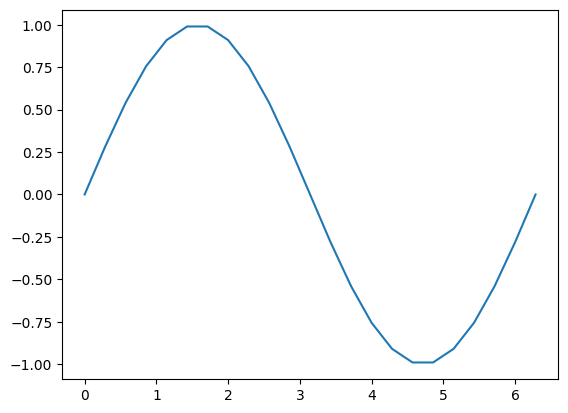

In [7]:
# calculando seno a partir de a
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [8]:
print(b)

tensor([ 0.0000e+00,  2.8173e-01,  5.4064e-01,  7.5575e-01,  9.0963e-01,
         9.8982e-01,  9.8982e-01,  9.0963e-01,  7.5575e-01,  5.4064e-01,
         2.8173e-01,  1.5100e-07, -2.8173e-01, -5.4064e-01, -7.5575e-01,
        -9.0963e-01, -9.8982e-01, -9.8982e-01, -9.0963e-01, -7.5575e-01,
        -5.4064e-01, -2.8173e-01,  1.7485e-07], grad_fn=<SinBackward0>)


##### History of Operations

In [9]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.6347e-01,  1.0813e+00,  1.5115e+00,  1.8193e+00,
         1.9796e+00,  1.9796e+00,  1.8193e+00,  1.5115e+00,  1.0813e+00,
         5.6346e-01,  3.0199e-07, -5.6347e-01, -1.0813e+00, -1.5115e+00,
        -1.8193e+00, -1.9796e+00, -1.9796e+00, -1.8193e+00, -1.5115e+00,
        -1.0813e+00, -5.6346e-01,  3.4969e-07], grad_fn=<MulBackward0>)
tensor([ 1.0000,  1.5635,  2.0813,  2.5115,  2.8193,  2.9796,  2.9796,  2.8193,
         2.5115,  2.0813,  1.5635,  1.0000,  0.4365, -0.0813, -0.5115, -0.8193,
        -0.9796, -0.9796, -0.8193, -0.5115, -0.0813,  0.4365,  1.0000],
       grad_fn=<AddBackward0>)


In [10]:
out = d.sum()
print(out)

tensor(23., grad_fn=<SumBackward0>)


In [23]:
# historico de operações de out até a origem a
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('a:')
print(a.grad_fn)

out:
((<AddBackward0 object at 0x7efe011c69d0>, 0),)
((<MulBackward0 object at 0x7efe011c61c0>, 0), (None, 0))
((<SinBackward0 object at 0x7efe011c66d0>, 0), (None, 0))
((<AccumulateGrad object at 0x7efe011c61c0>, 0),)
()
a:
None


##### Gradient

In [26]:
# como calcular o gradiente?
print(a.grad)
out.backward()
print(a.grad)

None
tensor([ 2.0000,  1.9190,  1.6825,  1.3097,  0.8308,  0.2846, -0.2846, -0.8308,
        -1.3097, -1.6825, -1.9190, -2.0000, -1.9190, -1.6825, -1.3097, -0.8308,
        -0.2846,  0.2846,  0.8308,  1.3097,  1.6825,  1.9190,  2.0000])


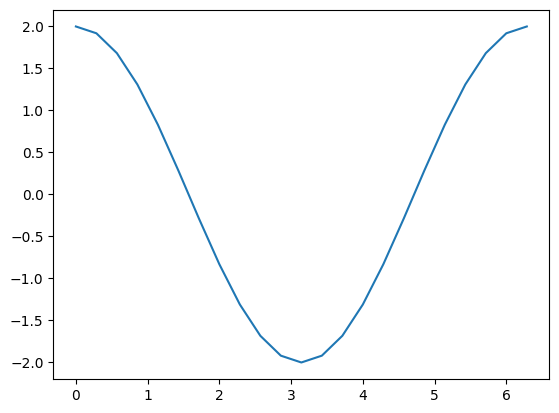

In [27]:
# derivada do seno é o cosseno
plt.plot(a.detach(), a.grad.detach())

##### Autograd in Training

In [31]:
class TinyModel(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(TinyModel, self).__init__(*args, **kwargs)
    
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [49]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [50]:
print(model)

TinyModel(
  (layer1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)


In [51]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([-0.0651, -0.0499, -0.0923, -0.0816,  0.0256,  0.0678, -0.0226,  0.0782,
         0.0169, -0.0951], grad_fn=<SliceBackward0>)
None


In [52]:
optimzer = torch.optim.SGD(model.parameters(), lr = 0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(140.8854, grad_fn=<SumBackward0>)


In [53]:
# observe que os gradientes foram calculados, mas os pesos não mudaram
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0651, -0.0499, -0.0923, -0.0816,  0.0256,  0.0678, -0.0226,  0.0782,
         0.0169, -0.0951], grad_fn=<SliceBackward0>)
tensor([2.3512, 1.0174, 1.6421, 0.8339, 0.0568, 1.8145, 0.6354, 2.3761, 1.0194,
        2.7865])


In [54]:
# só depois de invocar o optimizer que os pesos foram atualizados com os - lr * gradientes
optimzer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0674, -0.0510, -0.0939, -0.0824,  0.0256,  0.0660, -0.0232,  0.0758,
         0.0159, -0.0979], grad_fn=<SliceBackward0>)
tensor([2.3512, 1.0174, 1.6421, 0.8339, 0.0568, 1.8145, 0.6354, 2.3761, 1.0194,
        2.7865])


In [55]:
# importante: se tiver em um loop de treinamento tem que zerar o gradiente 
# após chamar o optimizer.step() porque o gradiente se acumula (ver exemplo)
# se o treinamento estiver mostrando resultados estranhos, esse erro de 
# implementação do loop pode ser a causa de um possível problema.

print('valor dos gradientes antes do loop:')
print(model.layer2.weight.grad[0][0:10])


for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print('valores dos gradientes após o loop:')
print(model.layer2.weight.grad[0][0:10])

print('valores dos gradientes após zerar optimizer:')
# set_to_none=False para retornar tensor com zeros
optimzer.zero_grad(set_to_none=False) 
print(model.layer2.weight.grad[0][0:10])


valor dos gradientes antes do loop:
tensor([2.3512, 1.0174, 1.6421, 0.8339, 0.0568, 1.8145, 0.6354, 2.3761, 1.0194,
        2.7865])
valores dos gradientes após o loop:
tensor([  5.8998,   2.3146,  13.5256,   0.0822,  -0.0230,   0.1136,  -4.0479,
          8.1075, -12.4363,  15.2180])
valores dos gradientes após zerar optimizer:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


##### Turning Autograd Off on On

In [56]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [57]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

# aqui desligamos o grad temporariamente
# bom para avaliação e inferencia
with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [58]:
# a desativação do grad pode ser por anotacao

def add_tensors(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [59]:
# pode ser usado detach também com já usado anteriormentes
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.1347, 0.7169, 0.2251, 0.2812, 0.2200], requires_grad=True)
tensor([0.1347, 0.7169, 0.2251, 0.2812, 0.2200])


In [60]:
# evitar uso de variáveis com grad em inplace operations

##### Autograd Profiler

In [61]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by="self_cpu_time_total"))


STAGE:2024-07-16 10:52:06 907114:907114 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2024-07-16 10:52:06 907114:907114 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-07-16 10:52:06 907114:907114 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                           aten::mul        33.37%       9.366ms        33.37%       9.366ms       9.366us      19.583ms        50.30%      19.583ms      19.583us          1000  
                           aten::div        33.35%       9.361ms        33.35%       9.361ms       9.361us      19.346ms        49.70%      19.346ms      19.346us          1000  
                     cudaEventRecord        31.72%       8.902ms        31.72%       8.902ms       2.225